In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

bs = 16

In [4]:
imagefiles = get_image_files('./images/train')
np.random.seed(2)
imagefiles[:5]

[PosixPath('images/train/board1_green-oval-hashed-single.png'),
 PosixPath('images/train/board2_purple-oval-hashed-triple.png'),
 PosixPath('images/train/board1_green-oval-filled-single.png'),
 PosixPath('images/train/board3_purple-oval-filled-triple.png'),
 PosixPath('images/train/board8_green-oval-filled-double.png')]

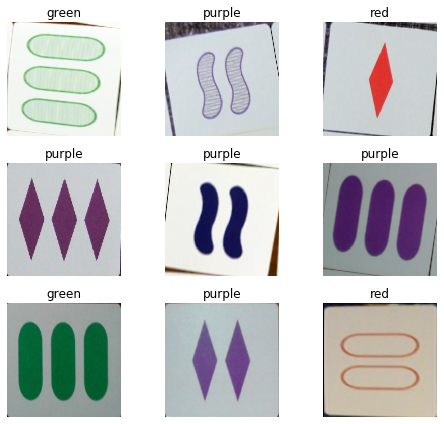

In [5]:
label_pattern = r'/board\d+_(red|green|purple)-(diamond|oval|squiggle)-(empty|filled|hashed)-(single|double|triple).png$'
bunch = ImageDataBunch.from_name_re('.', imagefiles, label_pattern, ds_tfms=get_transforms(max_zoom=1, max_warp=None), size=224, bs=bs, resize_method=ResizeMethod.SQUISH).normalize(imagenet_stats)
bunch.show_batch(rows=3, figsize=(7,6))

In [6]:
print(bunch.classes)
len(bunch.classes),bunch.c

['green', 'purple', 'red']


(3, 3)

In [18]:
learn = cnn_learner(bunch, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [19]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.211325,1.385360,0.600000,00:01
1,1.928299,1.076597,0.600000,00:01
2,1.551132,1.207525,0.500000,00:01
3,1.292825,1.413906,0.400000,00:01
4,1.078224,1.514714,0.400000,00:01
5,0.924389,1.402321,0.400000,00:01
6,0.801878,1.327726,0.300000,00:01
7,0.744458,1.279026,0.300000,00:01
8,0.667088,1.195317,0.300000,00:01
9,0.600370,1.100569,0.300000,00:00


In [20]:
learn.save('stage-1')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(bunch.valid_ds)==len(losses)==len(idxs)

True

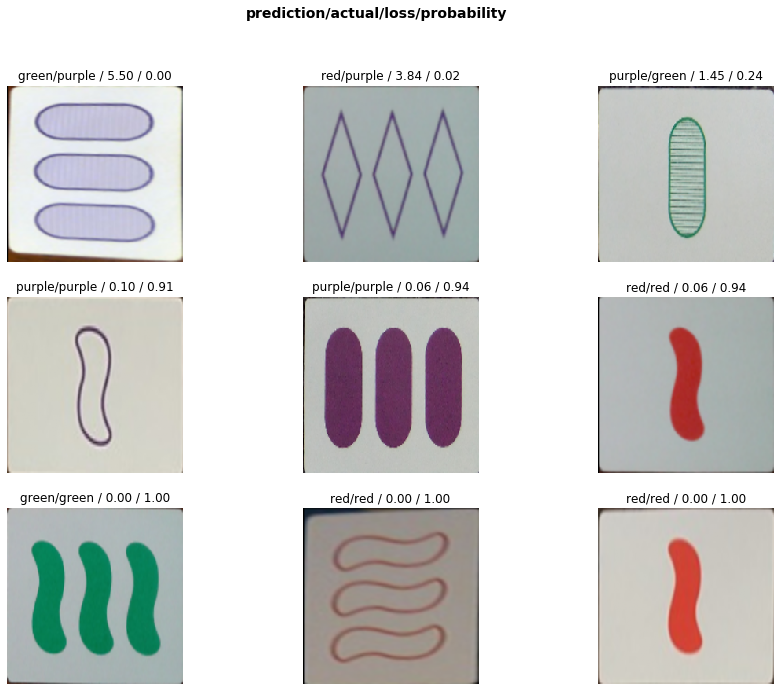

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


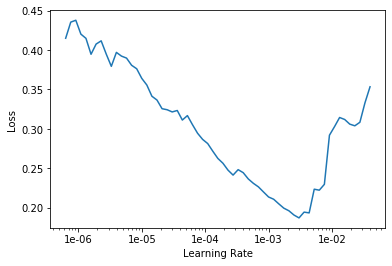

In [14]:
learn.recorder.plot()

In [24]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.260786,6.925908,0.600000,00:01
1,1.214801,90.876862,0.700000,00:01
2,1.429569,63.618614,0.600000,00:01
3,1.626418,62.142536,0.300000,00:01
4,1.418030,51.485069,0.400000,00:01
5,1.303452,29.510174,0.400000,00:01


In [32]:
learn = cnn_learner(bunch, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


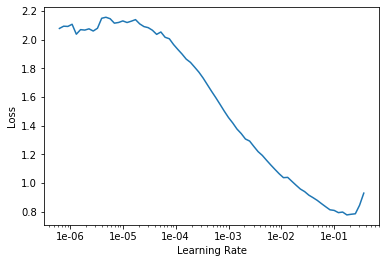

In [26]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.227375,1.300493,0.800000,00:01
1,1.772320,1.941270,0.700000,00:01
2,1.436114,2.983127,0.800000,00:01
3,1.130824,2.125846,0.500000,00:01
4,0.894127,1.729908,0.500000,00:01


In [28]:
learn.save('stage-1-50')

In [31]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,2.596791,3183257692667904.000000,0.600000,00:01
1,5.403239,5641585366025633792.000000,0.600000,00:01
2,5.057617,885304721408.000000,0.600000,00:01


In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[]